# Machine Learning Final Exam, Aug Semester, 2019

In this exam, you will demonstrate your understanding of the material from the lectures, tutorials, and problem sets.

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope.
Note that you have **2.5 hours** to do the exam. Also note that there are some short answer questions that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (10 points)

Generate 200 2D points from each of 2 Guassians with distributions shaped roughly as shown in the diagram below, with class 1 as the 'X's and class 2 as the 'O's. Plot the resulting 400 points with different colors for each Gaussian.

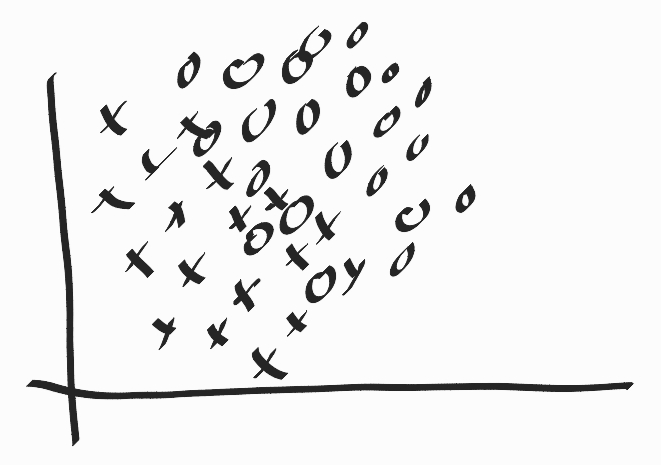

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Guntsv\AppData\Local\Temp\ipykernel_19376\1345352462.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  X1 = np.random.multivariate_normal(mu_1, sigma_1,points)
C:\Users\Guntsv\AppData\Local\Temp\ipykernel_19376\1345352462.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal(mu_2, sigma_2,points)


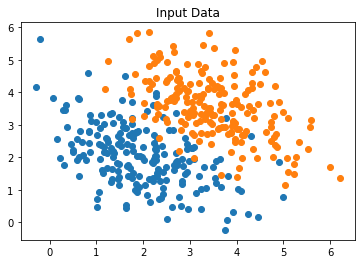

In [2]:
points = 200
mu_1 = np.array([2,2])
mu_2 = np.array([3.5,3.5])
sigma_1 = np.array([[-1, 0.5], [0.5, -1]])
sigma_2 = np.array([[-1, 0.5], [0.5, -1]])
X1 = np.random.multivariate_normal(mu_1, sigma_1,points)
X2 = np.random.multivariate_normal(mu_2, sigma_2,points)
X = np.concatenate((X1,X2),axis=0)

plt.scatter(X1[:,0],X1[:,1],cmap='red')
plt.scatter(X2[:,0],X2[:,1],cmap='green')
plt.title("Input Data")
plt.show()

## Question 2 (20 points)

Do the following:
1. Split the dataset from Question 1 into a training set (80%) and validation set (20%).
2. Fit a logistic regression model to the data in the training set.
3. Indicate the training set accuracy and validation set accuracy of the logistic regression model.
4. Make two separate plots, one for the training set and one for the validation set, with three colors: one for correctly classified points from class 1, one for correctly classified points from class 2, and one for incorrectly classified points.

In [3]:
def partition(X, y, percent_train=0.8):
    m = y.shape[0]
    idx = np.arange(0,m)
    random.seed(1412)
    random.shuffle(idx)
    m_train = int(m * percent_train)
    train_idx = idx[:m_train]
    test_idx = idx[m_train:]
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    return X_train, y_train.reshape(-1,1), X_test, y_test.reshape(-1,1)

In [4]:
X_train, y_train, X_val, y_val = partition(X,y,percent_train=0.8)
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((320, 2), (320, 1), (80, 2), (80, 1))

In [5]:
# YOUR CODE HERE
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0]
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        #print(cost)
        theta = theta + alpha * grad
        j_history.append(cost)
    return theta, j_history

In [6]:
X_train_aug = np.insert(X_train,0,1,axis=1)
X_test_aug = np.insert(X_val,0,1,axis=1)
X_train_aug.shape,X_test_aug.shape

((320, 3), (80, 3))

Optimal theta: -0.536947, 0.155500, 0.214193
Cost Funtion reducet from 2.444524 to  0.587367 in 10000 itreations


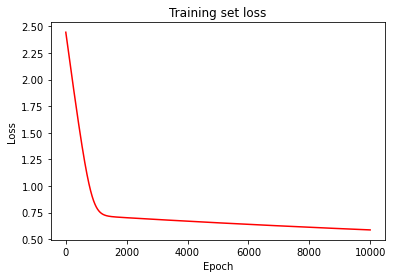

In [7]:
theta_initial = np.ones((3,1))
theta_final, j_history = train(X_train_aug, y_train, theta_initial, 0.001, 10000)
print('Optimal theta: %f, %f, %f' % (theta_final[0],theta_final[1],theta_final[2]))
print('Cost Funtion reducet from %f to  %f in %d itreations' % (j_history[0],j_history[-1],10000))

plt.plot(j_history, 'r-')
plt.title('Training set loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [8]:
yhat_train = h(X_train_aug, theta_final)
yhat_val = h(X_test_aug, theta_final)

In [9]:
def boundary_points(X, theta):
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

def find_point(yhat, ytest):
    Correct_class0 = []
    Correct_class1 = []
    Incorrect = []
    for index, i in enumerate(yhat):
        if (i == 0) and (ytest[index] == 0):
            Correct_class0.append(index)
        elif (i == 1) and (ytest[index] == 1):
            Correct_class1.append(index)
        else:
            Incorrect.append(index)
    return Correct_class0, Correct_class1, Incorrect

train_Cor0, train_Cor1, train_Incor = find_point(yhat_train, y_train)
val_Cor0, val_Cor1, val_Incor = find_point(yhat_val, y_val)

# convert to numpy array
train_Cor0, train_Cor1, train_Incor = np.array(train_Cor0), np.array(train_Cor1), np.array(train_Incor)
val_Cor0, val_Cor1, val_Incor = np.array(val_Cor0), np.array(val_Cor1), np.array(val_Incor)
print(train_Cor0.shape, train_Cor1.shape, train_Incor.shape)
print(val_Cor0.shape, val_Cor1.shape, val_Incor.shape)

(0,) (0,) (320,)
(0,) (0,) (80,)


IndexError: arrays used as indices must be of integer (or boolean) type

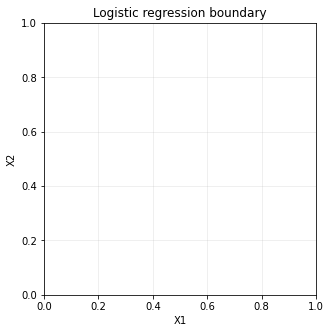

In [10]:
def plot_points(X, cor0, cor1, incor):
    fig1 = plt.figure(figsize=(5,5)) 
    ax = plt.axes() 
    ax.set_aspect(aspect = 'equal', adjustable = 'box')
    plt.title('Logistic regression boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(axis='both', alpha=.25)
    if len(cor0) != 0:
        ax.scatter(X[:, 1][cor0], X[:, 2][cor0], s=50, c='g', marker='.', label='y = 0')
    ax.scatter(X[:, 1][cor1], X[:, 2][cor1], s=50, c='b', marker='.', label='y = 0')
    ax.scatter(X[:, 1][incor], X[:, 2][incor], s=50, c='r', marker='x', label='y = 0')

plot_points(X_train, train_Cor0, train_Cor1, train_Incor)
plot_points(X_val, val_Cor0, val_Cor1, val_Incor)

## Question 3 (20 points)

Do the following:
1. Use the SVM code developed in class to fit linear SVMs to the training data from Question 2. Use several different values of hyperparameter c (the tolerance to points crossing the hyperplane), and plot validation set accuracy as a function of c.
2. Explain which model is best and why.

In [126]:
import numpy as np
import cvxopt

def cvxopt_solve_qp(Q, c, A=None, b=None, E=None, d=None):
    Q = .5 * (Q + Q.T)  # make sure Q is symmetric
    args = [cvxopt.matrix(Q), cvxopt.matrix(c)]
    if A is not None:
        args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
        if E is not None:
            args.extend([cvxopt.matrix(E), cvxopt.matrix(d)])
    sol = cvxopt.solvers.qp(*args)
    # if 'optimal' not in sol['status']:
    #     return None
    return np.array(sol['x']).reshape((Q.shape[1],))
    
def gauss_kernel(X):
    sigma = 0.2
    m = X.shape[0]
    K = np.matrix(np.zeros([m,m]))
    for i in range(0,m):
        for j in range(0,m):
            K[i,j] = (X[i,:] - X[j,:]).reshape(1,-1) @ (X[i,:] - X[j,:]).reshape(-1,1)
    K = np.exp(-K/(2*sigma*sigma))      
    return K

def linear_kernel(X):
    m = X.shape[0];
    K = np.matrix(np.zeros([m,m]));
    for i in range(0,m):
        for j in range(0,m):
            K[i,j] = X[i,:]@(X[j,:].T)
    return K;

def predict(x, X, y, alpha):
    s = []
    sigma = 0.2
    for j in range(x.shape[0]):
        ss = 0
        for i in range(X.shape[0]):
            ss += alpha[i]*y[i]*np.exp((-(X[i]-x[j])@(X[i]-x[j]))/(2*sigma*sigma))
        s.append(ss)
    s = np.array(s)
    s[s >= 0] = 1
    s[s < 0] = -1
    return s

def plot_classification(X1, X2):
    ax = plt.axes() 
    plt.title('Classification result')
    plt.grid(axis='both', alpha=.25)
    plt.plot(X1[:,0],X1[:,1],'b.', label = 'Class 1')
    plt.plot(X2[:,0],X2[:,1],'g*', label = 'Class 2')
    plt.legend(loc=2)
    ax.set_aspect('equal', 'datalim')
    return ax

In [127]:
#Convert 0/1 targets to -1/+1
y_train_svm = y_train
y_train_svm[y_train == 0] = -1
y_test_svm = y_val
y_test_svm[y_val == 0] = -1

In [128]:
X_train.shape,y_train_svm.shape

((320, 2), (320, 1))

In [129]:
m,n = X_train.shape
K = linear_kernel(X_train);
Q = np.multiply(y_train_svm * y_train_svm.T, K)
print('Q rank: %d' % np.linalg.matrix_rank(Q))
c = -np.ones([m])
A = -np.eye(m)
b = np.zeros([m])
E = y_train_svm.T
d = np.zeros(1)
alpha_star = cvxopt_solve_qp(Q, c, A, b, E, d);
print("Optimal alpha:")
# print(alpha_star)

Q rank: 2
     pcost       dcost       gap    pres   dres
 0: -8.9485e+01 -2.3676e+02  2e+03  3e+01  3e+00
 1: -2.2240e+02 -4.6104e+02  1e+03  3e+01  2e+00
 2: -5.6623e+02 -1.1015e+03  1e+03  2e+01  2e+00
 3: -2.3493e+03 -3.3740e+03  1e+03  2e+01  1e+00
 4: -9.3582e+03 -9.8676e+03  5e+02  1e+01  1e+00
 5: -7.0217e+04 -7.2799e+04  3e+03  1e+01  1e+00
 6: -2.9738e+05 -3.0706e+05  1e+04  1e+01  1e+00
 7: -1.8656e+06 -1.9162e+06  5e+04  1e+01  1e+00
 8: -3.1109e+07 -3.1603e+07  5e+05  1e+01  1e+00
 9: -1.8456e+09 -1.8482e+09  3e+06  1e+01  1e+00
10: -8.8301e+10 -8.8430e+10  1e+08  1e+01  1e+00
Terminated (singular KKT matrix).
Optimal alpha:


In [130]:
y_pred = predict(X_val, X_val, y_val, alpha_star)
print("Accuracy :",np.sum(y_val == y_pred)/y_val.size)

Accuracy : 0.9375


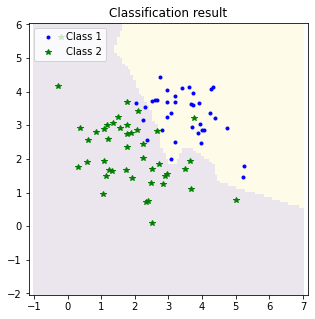

In [131]:
x_series = np.linspace(-1, 7, 100)
y_series = np.linspace(-2, 6, 100)

x_mesh, y_mesh = np.meshgrid(x_series, y_series)

x_mesh = x_mesh.reshape(-1, 1)
y_mesh = y_mesh.reshape(-1, 1)

mesh = np.append(x_mesh, y_mesh, axis=1)
y_pred = predict(mesh, X_val, y_val, alpha_star)

x_mesh = x_mesh.reshape(100, 100)
y_mesh = y_mesh.reshape(100, 100)
y_pred = y_pred.reshape(100, 100)

X1 = X_val[y_val.squeeze(1) == 1]
X2 = X_val[y_val.squeeze(1) == -1]
fig1 = plt.figure(figsize=(5,5))
ax = plot_classification(X1, X2)
ax.pcolormesh(x_mesh, y_mesh, y_pred, cmap='viridis', shading='auto', alpha=0.1)
plt.show()

## Question 4 (20 points)

Do the following:
1. Use the SVM code developed in class to fit SVMs with the RBF kernel to the training data from Question 2. Use several different values of hyperparameter c (the tolerance to points crossing the hyperplane) and gamma (the basis function width), and plot validation set accuracy as a function of c and gamma.
2. Explain which model is best and why.

In [132]:
def gauss_kernel(X):
    sigma = 0.2
    m = X.shape[0]
    K = np.matrix(np.zeros([m,m]))
    for i in range(0,m):
        for j in range(0,m):
            K[i,j] = (X[i,:] - X[j,:]).reshape(1,-1) @ (X[i,:] - X[j,:]).reshape(-1,1)
    K = np.exp(-K/(2*sigma*sigma))      
    return K
    
def cvxopt_solve_qp(Q, c, A=None, b=None, E=None, d=None):
    Q_new = 0.5 * (Q + Q.T)
    args = [cvxopt.matrix(Q_new), cvxopt.matrix(c)]
    if A is not None:
        args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
        if E is not None:
            args.extend([cvxopt.matrix(E), cvxopt.matrix(d)])
    sol = cvxopt.solvers.qp(*args)
    if sol is not None and 'optimal' not in sol['status']:
        return None
    x = np.array(sol['x'])
    return x.reshape(-1)

def predict(x, X, y, alpha):
    s = []
    sigma = 0.2
    for j in range(x.shape[0]):
        ss = 0
        for i in range(X.shape[0]):
            ss += alpha[i]*y[i]*np.exp((-(X[i]-x[j])@(X[i]-x[j]))/(2*sigma*sigma))
        s.append(ss)
    s = np.array(s)
    s[s >= 0] = 1
    s[s < 0] = -1
    return s

def plot_classification(X1, X2):
    ax = plt.axes() 
    plt.title('Classification result')
    plt.grid(axis='both', alpha=.25)
    plt.plot(X1[:,0],X1[:,1],'b.', label = 'Class 1')
    plt.plot(X2[:,0],X2[:,1],'g*', label = 'Class 2')
    plt.legend(loc=2)
    ax.set_aspect('equal', 'datalim')
    return ax

In [133]:
m, n = X_train.shape
K = gauss_kernel(X_train)
Q = np.multiply(y_train * y_train.T, K)
print('Q rank: %d' % np.linalg.matrix_rank(Q))
c = -np.ones([m])
A = -np.eye(m)
b = np.zeros([m])
E = y_train.T
d = np.zeros(1)

alpha_star = cvxopt_solve_qp(Q, c, A, b, E, d)
# print(alpha_star)

Q rank: 320
     pcost       dcost       gap    pres   dres
 0: -6.1491e+01 -2.2093e+02  2e+02  2e-15  2e+00
 1: -7.9035e+01 -1.5036e+02  7e+01  1e-15  1e+00
 2: -1.5571e+02 -2.4595e+02  9e+01  3e-14  1e+00
 3: -2.6814e+02 -3.9053e+02  1e+02  2e-14  7e-01
 4: -3.4591e+02 -4.1808e+02  7e+01  5e-14  2e-01
 5: -3.5491e+02 -3.6985e+02  1e+01  6e-14  4e-02
 6: -3.5602e+02 -3.5706e+02  1e+00  9e-14  3e-04
 7: -3.5626e+02 -3.5651e+02  3e-01  4e-14  5e-05
 8: -3.5634e+02 -3.5636e+02  2e-02  5e-14  9e-08
 9: -3.5634e+02 -3.5635e+02  3e-03  3e-14  6e-09
10: -3.5635e+02 -3.5635e+02  9e-05  1e-13  1e-10
Optimal solution found.


In [134]:
y_pred = predict(X_val, X_val, y_val, alpha_star)
print("Accuracy :",np.sum(y_val == y_pred)/y_val.size)

Accuracy : 0.875


In [135]:
x_series = np.linspace(-5, 6, 100)
y_series = np.linspace(-5, 5, 100)

x_mesh, y_mesh = np.meshgrid(x_series, y_series)

x_mesh = x_mesh.reshape(-1, 1)
y_mesh = y_mesh.reshape(-1, 1)

mesh = np.append(x_mesh, y_mesh, axis=1)
y_pred = predict(mesh, X_val, y_val, alpha_star)

x_mesh = x_mesh.reshape(100, 100)
y_mesh = y_mesh.reshape(100, 100)
y_pred = y_pred.reshape(100, 100)

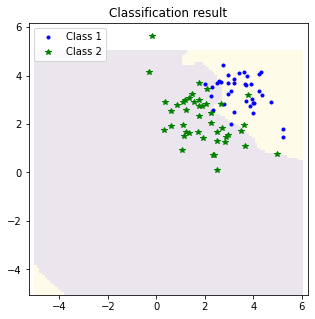

In [136]:
X1 = X_val[y_val.squeeze(1) == 1]
X2 = X_val[y_val.squeeze(1) == -1]
fig1 = plt.figure(figsize=(5,5))
ax = plot_classification(X1, X2)
ax.pcolormesh(x_mesh, y_mesh, y_pred, cmap='viridis', shading='auto', alpha=0.1)
plt.show()

## Question 5 (20 points)

Using the neural network code you developed (based on the code from class) for the deep learning homework assignment, do the following:
1. Fit a two-layer neural network with ReLU activations in the hidden layer and a logistic output layer to the training data from Question 2. Use several different numbers of hidden units in the hidden layer, and plot validation set accuracy as a function of the number of units in the hidden layer.
2. Explain which neural network is best and why, and briefly compare the neural network to the logistic regression and SVM models developed in the previous questions.

## Question 6 (10 points)

Consider what would happen if you got the data from Question 1 *without labels* and were tasked with using unsupervised learning to model and understand the data set. Based on a quick visualization, you see that there seem to be two main clusters in the data and decide to build a $k$-means ($k$=2) or GMM for the dataset.

Obviously, a GMM would be appropriate, as the data were generated from a mixture of Gaussians in the first place. On the other hand, the $k$-means model would be simpler. Would it be as effective?

Do the following:
1. Write the parameters $\phi_1$, $\phi_2$, $\mathbf{\mu}_1$, $\mathbf{\mu}_2$, $\mathtt{\Sigma}_1$, $\mathtt{\Sigma}_2$ of the "ground truth" model used to generate the data in Question 1.
2. Briefly discuss whether, in practice, the $k$-means model would be worse than, equally good, or better than a GMM for this dataset.



(500, 2)


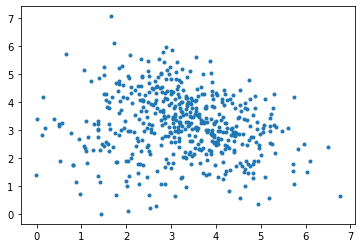

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# Ground truth means and covariances for the data we'll generate
means_gt = [ [2,2], [3.5,3.5]]
sigmas_gt = [ np.matrix([[-1, 0.5], [0.5, -1]]), 
              np.matrix([[-1, 0.5], [0.5, -1]])]

# Ground truth Prior probability (phi_j) for each cluster
phi_gt = [ 0.2, 0.2 ]

# For more interesting covariances, you can also try, for example,
# [[11.31371, -0.70711],[11.31371, 0.70711]] or
# [[11.31371, 0.70711],[-11.31371, 0.70711]].
# Size of dataset
m = 500
# number of variables
n = len(means_gt[0])
# k number of clusters/outcomes
k = len(phi_gt)
# Ground truth indices of cluster identities
Z = [0]*m
# Generate a new k-means dataset
def gen_dataset():
    X = np.zeros((m,n))
    # Generate m samples from multinomial distribution using phi_gt
    z_vectors = np.random.multinomial(1, phi_gt, size=m)  # Result: binary matrix of size (m x k)
    for i in range(m):
        # Convert one-hot representation z_vectors[i,:] to an index
        Z[i] = np.where(z_vectors[i,:] == 1)[0][0]
        # Grab ground truth mean mu_{z^i}
        mu = means_gt[Z[i]]                
        # Grab ground truth covariance Sigma_{z^i}
        sigma = sigmas_gt[Z[i]]
        # Sample a 2D point from mu, sigma
        X[i,:] = np.random.multivariate_normal(mu,sigma,1)
    return X

X = gen_dataset()
print(X.shape)
plt.scatter(X[:,0],X[:,1],marker=".",cmap='viridis')

In [148]:
def init_gmm(X, k):
    m = X.shape[0]
    n = X.shape[1]
    Mu = np.zeros((n,k))
    Sigma = np.zeros((k,n,n))
    Phi = np.zeros(k)
    order = np.random.permutation(m)
    for j in range(k):
        # Initially assign equal probability to each cluster/outcome
        Phi[j] = 1/k      
        # Ramdomly assign mean to one of the data points       
        Mu[:,j] = X[order[j],:].T
        # Initial covariance is identity matrix
        Sigma[j,:,:] = np.eye(n)    
    return Phi, Mu, Sigma


def Gaussian(X, mean, covariance):
    k = len(mean)
    X = X - mean.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(covariance)**0.5)) * np.exp(-0.5 * np.sum(X @ np.linalg.pinv(covariance) * X, axis=1))
    return p

def gaussian(x, mean,covariance):
    k = len(mean)
    X = (x - mean).reshape(-1,1)
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(covariance)**0.5)) * np.exp(-0.5 * (X.T @ np.linalg.pinv(covariance) @ X))
    return p


# Run one iteration of EM

def iterate_em_gmm(X, threshold, Phi, Mu, Sigma):
    m = X.shape[0]
    n = X.shape[1]
    k = len(Phi)
    threshold = np.reshape(np.repeat(threshold, n*k), (n,k))
    pj_arr = np.zeros((m,k))
    
    # E-step: calculate w_j^i
    W = np.zeros((m, k))
    for j in range(k):
        pj = Gaussian(X, Mu[:,j], Sigma[j])
        pj_arr[:,j] = pj
        W[:,j] = Phi[j] * pj
    
    # W tells us what is the relative weight of each cluster for each data point
    W[:,:] = W * np.tile(1/np.sum(W,1),(k,1)).T

    # M-step: adjust mean and sigma
    Phi[:] = sum(W) / m
    Mu_previous = Mu.copy()
    for j in range(k):
        # Split cluster specific W for each dimension
        Wj = np.tile(W[:,j],(2,1)).T
        # Compute Mu for each variable for each cluster
        Mu[:,j] = sum(X * Wj)/sum(Wj)
        Muj = np.tile(Mu[:,j],(m,1))
        Sigma[j,:,:] = np.matmul((X - Muj).T, (X - Muj) * Wj) / sum(W[:,j])

    if (abs(Mu-Mu_previous) <= threshold).all():
        converged = True
    else:
        converged = False

    labels = np.argmax(pj_arr, axis = 1)
    pj = np.max(pj_arr,axis=1)
    X_label = np.insert(X, 2, labels, axis=1)
    return converged, pj, X_label

In [149]:
threshold = np.matrix(.01)

Phi, Mu, Sigma = init_gmm(X, k)

converged = False
while not converged:
    converged, pj, X_label = iterate_em_gmm(X, threshold, Phi, Mu, Sigma)

In [150]:
print(Phi)
print(phi_gt)
phi_gt = np.array(phi_gt).reshape(-1,1)
phi_mse = np.mean(np.min((Phi-phi_gt)**2,axis=1))
print(phi_mse)

print(Mu)
print(np.array(means_gt).T)

print(Sigma)
print(sigmas_gt)

[0.28404271 0.71595729]
[0.2, 0.2]
0.0070631774084791675
[[2.26194229 3.62455943]
 [2.59342625 3.43864636]]
[[2.  3.5]
 [2.  3.5]]
[[[ 1.09753636 -0.03558476]
  [-0.03558476  1.17572074]]

 [[ 1.00620181 -0.61611225]
  [-0.61611225  1.18048401]]]
[matrix([[-1. ,  0.5],
        [ 0.5, -1. ]]), matrix([[-1. ,  0.5],
        [ 0.5, -1. ]])]


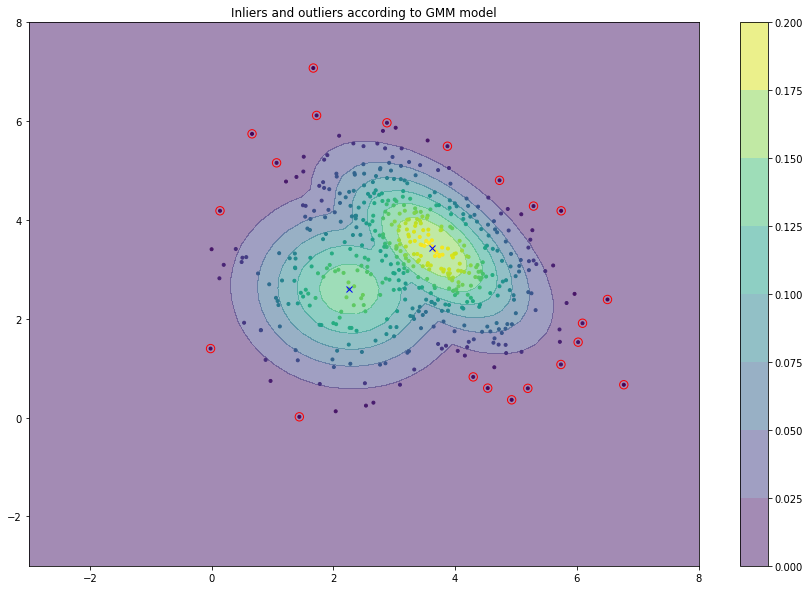

In [151]:
outlier_prob = .01
outliers = np.nonzero(pj < outlier_prob)[0]

fig1 = plt.figure(figsize=(15,10))

xlist = np.linspace(-3, 8, 50)
ylist = np.linspace(-3, 8, 50)
XX, YY = np.meshgrid(xlist, ylist)
ZZ = np.zeros(XX.shape)

for c in np.arange(0,k):    
    X_class = X[np.where(X_label[:,2] == c)[0],:]
    
    Z = np.zeros(XX.shape)
    i = 0
    while i < XX.shape[0]:
        j = 0
        while j < XX.shape[0]:
            pt = np.array([[XX[i,j], YY[i,j]]])
            Z[i,j] = Gaussian(pt, Mu[:,c], Sigma[c])[0]
            j = j + 1
        i = i + 1    
    ZZ = np.maximum(ZZ,Z)
cp = plt.contourf(XX, YY, ZZ,alpha=0.5)
cbar = fig1.colorbar(cp)

plt.scatter(X[:,0],X[:,1],marker=".",c=pj,cmap='viridis');
plt.scatter(X[outliers,0],X[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);
plt.plot(Mu[0,0], Mu[1,0],'bx',Mu[0,1], Mu[1,1],'bx')

plt.title('Inliers and outliers according to GMM model')
plt.show()

Iter 0 : distortion = 1.941611
Iter 20 : distortion = 1.703048
Iter 40 : distortion = 1.703048
Iter 60 : distortion = 1.703048
Iter 80 : distortion = 1.703048


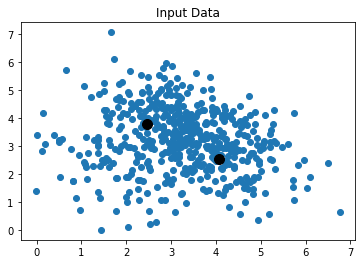

In [155]:
iters = 100
m,n = X.shape
k = 2
indices = np.arange(m)
np.random.shuffle(indices)

#1. Initialize means
means = X[indices[0:2],:]
means

#2. Repeat until convergence

C = np.zeros(m,dtype=int)
for iter in range(iters):
    if iter == iters-1:
        plt.scatter(X[:,0],X[:,1],cmap='green')
        plt.scatter(means[:,0],means[:,1],c ='black',s=100)
        plt.title('Input Data')
        plt.show()
    #2.1 map each datum to its nearest cluster center
    dist = 0
    for i in range(m):
        C[i] = np.argmin(np.linalg.norm(X[i,:]-means,axis=1))
        dist = dist + np.linalg.norm(X[i,:]-means[C[i],:])**2
    dist = dist/m
    if iter % 20 == 0:
        print('Iter %d : distortion = %f' % (iter,dist))
    
    #2.2 adjust means
    for j in range(k):
        means[j,:]=np.mean(X[C==j],axis=0)